# AGV in Factory, Assembly Agent Update

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math
import numpy as np
import seaborn as sns

In [2]:
from environment_factory import Environment
from astar_agent import Astar_Agent
import random

In [3]:
grid = [
    [9, 9, 9, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 9, 9, 9],
    [9, 9, 9, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 9, 9, 0, 9],
    [9, 9, 9, 0, 0, 0, 0, 9],
    [2, 0, 0, 0, 9, 9, 9, 9],
]

env = Environment(grid)

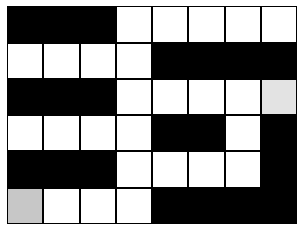

In [4]:
sns.heatmap(grid,square=True,cbar=False,cmap='gray_r',linewidths=1, linecolor='Black', fmt='s'
           ,xticklabels=False, yticklabels=False)
plt.show()

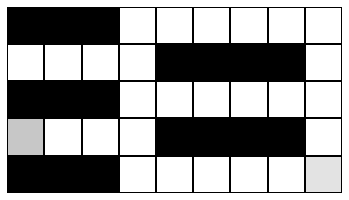

In [5]:
grid2 = [
    [9, 9, 9, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 9, 9, 9, 9, 0],
    [9, 9, 9, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 9, 9, 9, 9, 0],
    [9, 9, 9, 0, 0, 0, 0, 0, 1]
]

sns.heatmap(grid2,square=True,cbar=False,cmap='gray_r',linewidths=1, linecolor='Black', fmt='s'
           ,xticklabels=False, yticklabels=False)
plt.show()
env = Environment(grid2)

## A*+ Agent

2
Episode 0: Agent gets 28.978125000000016 reward. 0.034375 0.784375 3.4375


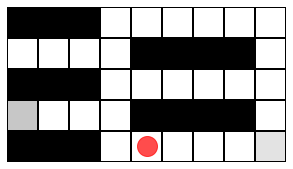

In [6]:
for i in range(1):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid2)
    total_reward = 0
    total_product = 0
    total_inproduct = env.agv_stock + env.assembly.stock
    print(total_inproduct)
    total_stock = 0
    total_input = 0
    done = False
    step = 0
    # - product test --
    history_product = []
    history_stock = []
    
    while not done:
        env.render(state, done)
        step += 1
        
        # Random action
        #action = random.choice(env.actions)
        #next_state, reward, done = env.step(action)
        
        # Astar action
        action = astar_agent.action_standby([state.row, state.column], state.agv_stock)
        next_state, reward, done = env.step(env.actions[action])
        
        # Reward
        total_reward += reward
        
        # Cumulative Historical Data
        total_product += env.assembly.product
        total_inproduct += env.assembly_in.product
        total_stock += env.assembly_in.product_all
        total_input += env.assembly.stock
        
        # State Update
        state = next_state
        
        # history of product
        history_product.append([step, env.assembly.product, total_product, env.assembly_in.product, total_inproduct])
        # history of stock
        history_stock.append([step, env.assembly_in.product_all, total_stock, 
                              env.assembly.stock, total_input])
              
    print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
          total_product/step, total_stock/step, total_input/step) 
HTML(env.render(state, done).to_jshtml())

## Save of AGV agents

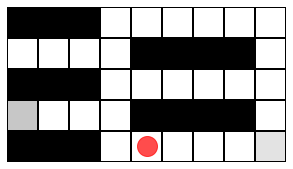

In [7]:
#env.render(state, done).save("a_star.gif", writer="pillow")
env.render(state, done).save("a_star_mp.mp4", writer="ffmpeg")
#plt.close()

# Results of Assembly agent output

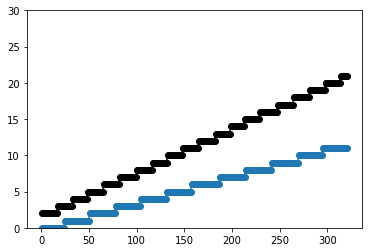

In [8]:
ast_history_product = np.array(history_product)
ast_history_stock = np.array(history_stock)

plt.ylim(0, 30)
#plt.step(ast_history_product[:, 0], ast_history_product[:, 1], '-o')
plt.step(ast_history_product[:, 0], ast_history_product[:, 2], '-o')
#plt.step(ast_history_product[:, 0], ast_history_product[:, 3], '-o')
plt.step(ast_history_product[:, 0], ast_history_product[:, 4], '-o', color='Black')
plt.show()

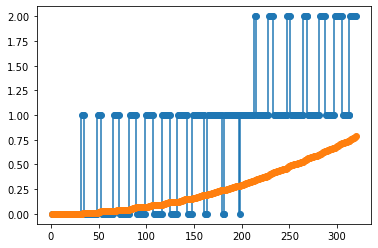

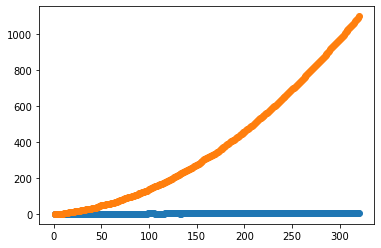

In [9]:
plt.step(ast_history_stock[:, 0], ast_history_stock[:, 1], '-o')
plt.step(ast_history_stock[:, 0], ast_history_stock[:, 2]/step, '-o')
plt.show()
plt.step(ast_history_stock[:, 0], ast_history_stock[:, 3], '-o')
plt.step(ast_history_stock[:, 0], ast_history_stock[:, 4], '-o')
plt.show()

## Random Agent

Episode 0: Agent gets -13.656250000000046 reward. 0.003125 1.85625 0.0


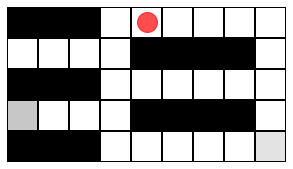

In [10]:
for i in range(1):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid2)
    total_reward = 0
    total_product = 0
    total_inproduct = env.agv_stock + env.assembly.stock
    total_stock = 0
    total_input = 0
    done = False
    step = 0
    # - product test --
    history_product = []
    history_stock = []
    
    while not done:
        env.render(state, done)
        step += 1
        
        # Random action
        action = random.choice(env.actions)
        next_state, reward, done = env.step(action)
        
        # Astar action
        #action = astar_agent.action_standby([state.row, state.column], state.agv_stock)
        #next_state, reward, done = env.step(env.actions[action])
        
        # Reward
        total_reward += reward
        
        # Cumulative Historical Data
        total_product += env.assembly.product
        total_inproduct += env.assembly_in.product
        total_stock += env.assembly_in.product_all
        total_input += env.assembly.stock
        
        # State Update
        state = next_state
        
        # history of product
        history_product.append([step, env.assembly.product, total_product, env.assembly_in.product, total_inproduct])
        # history of stock
        history_stock.append([step, env.assembly_in.product_all, total_stock, 
                              env.assembly.stock, total_input])
              
    print("Episode {}: Agent gets {} reward.".format(i, total_reward), 
          total_product/step, total_stock/step, total_input/step) 
HTML(env.render(state, done).to_jshtml())

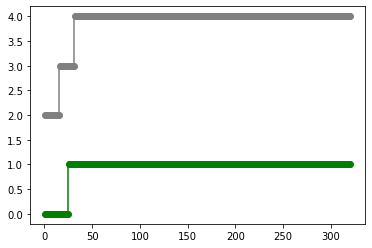

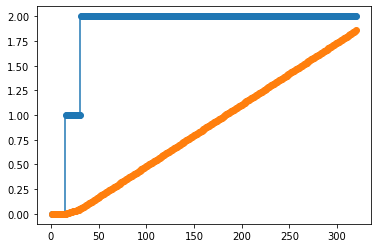

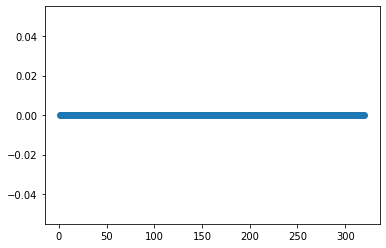

In [11]:
random_history_product = np.array(history_product)
random_history_stock = np.array(history_stock)

#plt.step(random_history_product[:, 0], random_history_product[:, 1], '-o')
plt.step(random_history_product[:, 0], random_history_product[:, 2], '-o', color='Green')
#plt.step(random_history_product[:, 0], random_history_product[:, 3], '-o')
plt.step(random_history_product[:, 0], random_history_product[:, 4], '-o', color='Gray')
plt.show()
plt.step(random_history_stock[:, 0], random_history_stock[:, 1], '-o')
plt.step(random_history_stock[:, 0], random_history_stock[:, 2]/step, '-o')
plt.show()
plt.step(random_history_stock[:, 0], random_history_stock[:, 3], '-o')
#plt.step(random_history_stock[:, 0], random_history_stock[:, 4], '-o')
plt.show()

# R vs A*+

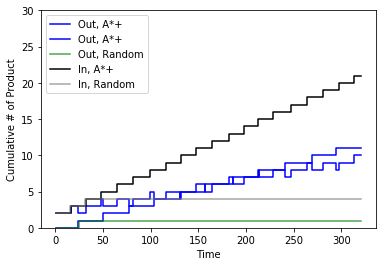

In [13]:
plt.ylim(0, 30)
plt.xlabel('Time')
plt.ylabel('Cumulative # of Product')

plt.step(ast_history_product[:, 0], ast_history_product[:, 4]-ast_history_product[:, 2], '-', color='Blue', label='Out, A*+')

plt.step(ast_history_product[:, 0], ast_history_product[:, 2], '-', color='Blue', label='Out, A*+')
plt.step(random_history_product[:, 0], random_history_product[:, 2], '-', color='Green', alpha=0.7, label='Out, Random')

plt.step(ast_history_product[:, 0], ast_history_product[:, 4], '-', color='Black',label='In, A*+')
plt.step(random_history_product[:, 0], random_history_product[:, 4], '-', color='gray', alpha=0.7, label='In, Random')
plt.legend()
plt.show()


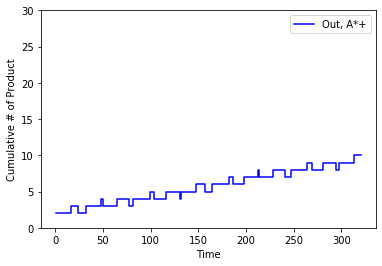

In [14]:
plt.ylim(0, 30)
plt.xlabel('Time')
plt.ylabel('Cumulative # of Product')

plt.step(ast_history_product[:, 0], ast_history_product[:, 4]-ast_history_product[:, 2], '-', color='Blue', label='Out, A*+')


plt.legend()
plt.show()



In [15]:
ast_history_product[:, 4]-ast_history_product[:, 2]

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

In [16]:
ast_history_product[:, 2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8